In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [13]:
data_filtered = pd.read_csv('data_filtered.csv')

In [14]:
data_filtered.shape

(379588, 11)

In [15]:
data_filtered.sample(3)

,date,temperature,turbidity,dissolved_oxygen,ph,ammonia,nitrate,population,fish_length,fish_weight,pond
348231,07-07-2021,25.1875,83.0,26.111,7.47128,0.43151,114.0,NaN,12.688571,22.714286,Pond 9
347743,07-07-2021,24.4375,82.0,39.480,7.50759,0.87672,97.0,NaN,12.688571,22.714286,Pond 9
365840,14-07-2021,24.0000,97.0,16.743,7.38503,0.06310,126.0,NaN,15.048571,40.414286,Pond 9


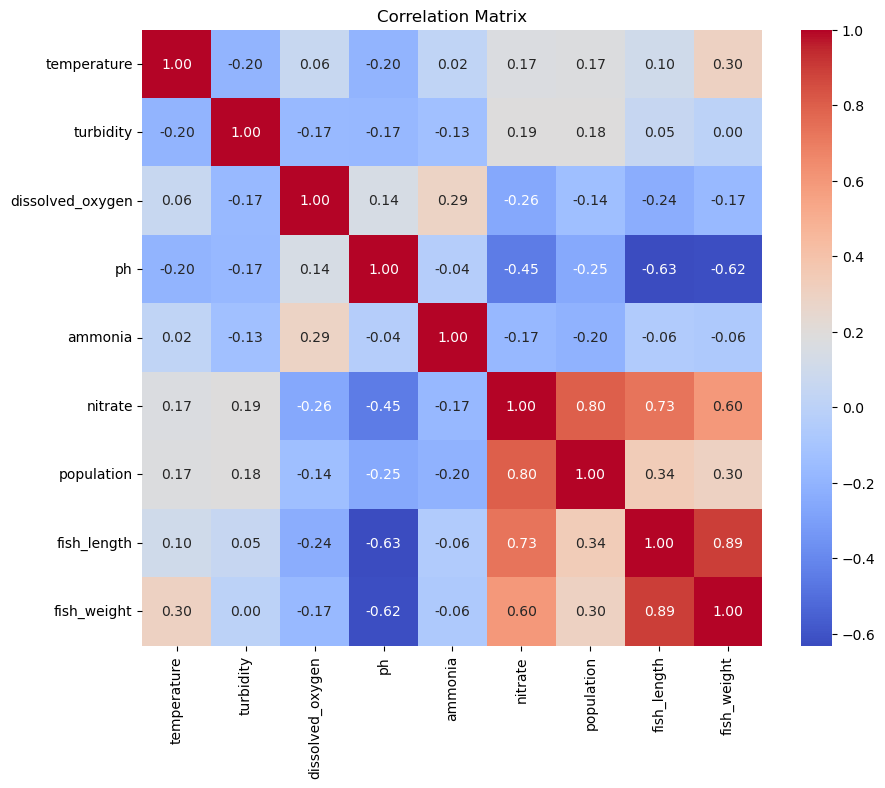

In [66]:
correlation_matrix = data_filtered.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [8]:
data_filtered.columns

Index(['date', 'temperature', 'turbidity', 'dissolved_oxygen', 'ph', 'ammonia',
       'nitrate', 'fish_length', 'fish_weight', 'df'],
      dtype='object')

In [26]:
data_filtered_rand = data_filtered.sample(frac=1).reset_index(drop=True)

In [10]:
data_filtered_rand.columns

Index(['date', 'temperature', 'turbidity', 'dissolved_oxygen', 'ph', 'ammonia',
       'nitrate', 'fish_length', 'fish_weight', 'df'],
      dtype='object')

In [65]:
data_filtered.sample(3)

,date,temperature,turbidity,dissolved_oxygen,ph,ammonia,nitrate,population,fish_length,fish_weight,pond
109209,15-08-2021,24.4375,90.0,2.417,7.08542,0.95885,950.0,50.0,21.330000,70.600000,Pond 2
212431,04-09-2021,22.7500,100.0,0.906,5.14253,0.00426,1552.0,75.0,25.780000,146.100000,Pond 6
260512,16-08-2021,24.5625,34.0,17.267,7.04003,1.09643,976.0,NaN,23.788571,143.542857,Pond 7


In [ ]:
# def calculate_feed_rate_gm_per_ph(row):
    
#     fish_weight = row['fish_weight']
#     fish_length = row['fish_length']
#     dissolved_oxygen_levels = row['dissolved_oxygen']
#     temperature = row['temperature']
#     pH = row['ph']
    
#     feed_rate_gm_per_ph = (fish_weight * fish_length * (dissolved_oxygen_levels + temperature)) / pH
    
#     return feed_rate_gm_per_ph



# def calculate_feed_rate_gm(row):
    
#     fish_weight = row['fish_weight']
#     fish_length = row['fish_length']
#     dissolved_oxygen_levels = row['dissolved_oxygen']
#     temperature = row['temperature']
#     pH = row['ph']
    
#     feed_rate_gm = (fish_weight * fish_length * (dissolved_oxygen_levels + temperature))
    
#     return feed_rate_gm



# def calculate_feed_rate_kg(row):
    
#     fish_weight = row['fish_weight']
#     fish_length = row['fish_length']
#     dissolved_oxygen_levels = row['dissolved_oxygen']
#     temperature = row['temperature']
#     pH = row['ph']
    
#     feed_rate_kg = (fish_weight * fish_length * (dissolved_oxygen_levels + temperature)) / 1000
    
#     return feed_rate_kg

In [ ]:
# data_filtered_rand['feed_rate_gm_per_ph'] = data_filtered_rand.apply(calculate_feed_rate_gm_per_ph, axis=1)
# data_filtered_rand['feed_rate_gm'] = data_filtered_rand.apply(calculate_feed_rate_gm, axis=1)
# data_filtered_rand['feed_rate_kg'] = data_filtered_rand.apply(calculate_feed_rate_kg, axis=1)

## Average Feed Amount

### Catfish

In [ ]:
"biomass = 0.005 × (Fish Length (cm)) ^ 3.2"

In [ ]:
"Feed Rate = Fish Weight×FCR×Number of Fish"

In [ ]:
"Fish Weight = a × (Fish Length) ^ b"

In [ ]:
"Feed Rate (g/day) = Feeding Duration / Total Feed Provided"

In [ ]:
"Feed Ratio (%) = (Total Feed Provided / Total Fish Biomass) * 100"

In [36]:
# if an African catfish of 180 grams
# requires a ration of 2.5% of its body
# weight, how much food should it be
# given per day?

# Amount of feed to be fed per day = 180 grams(fish weight) x 2.5/100(%)
# = 4.5 grams feed per fish per day.

# If there are 1000 fish in the pond, then;
# = 4.5 g x 1000 fish = 4,500 g (4.5 kg) of
# feed should be weighed out for the day.

In [33]:
def calculate_feed_amount(row):
    
    fish_weight = row['fish_weight']
    
    feed_amount_gms = fish_weight * (2.5/100)
    
    return feed_amount

In [41]:
data_filtered_rand['feed_amount'] = data_filtered_rand.apply(calculate_feed_amount, axis=1)
data_filtered_rand.sample(6)

,date,temperature,turbidity,dissolved_oxygen,ph,ammonia,nitrate,population,fish_length,fish_weight,pond,feed_amount
193345,03-08-2021,23.6875,100.0,21.915,7.29424,3.00579,576.0,50.0,18.470000,50.880000,Pond 2,1.272000
191436,04-09-2021,25.1250,36.0,2.627,6.97648,0.05975,1753.0,NaN,29.730000,237.000000,Pond 7,5.925000
52807,03-08-2021,23.8125,99.0,27.557,7.29424,4.10629,538.0,50.0,19.700000,65.320000,Pond 1,1.633000
71260,27-07-2021,23.3750,24.0,2.124,7.51213,0.00080,283.0,NaN,17.051429,52.342857,Pond 8,1.308571
16638,12-08-2021,23.1250,95.0,1.580,7.13082,0.25902,890.0,50.0,20.730000,64.020000,Pond 2,1.600500
66393,25-07-2021,23.6875,100.0,2.767,6.48622,0.15867,967.0,75.0,17.680000,53.010000,Pond 6,1.325250


## Fish Biomass

In [45]:
def calculate_fish_biomass(row):
    
    fish_length = row['fish_length']
    
    fish_biomass = 0.005 * (math.pow(fish_length,3.2))
    
    return fish_biomass

In [46]:
data_filtered_rand['fish_biomass'] = data_filtered_rand.apply(calculate_fish_biomass, axis=1)
data_filtered_rand.sample(6)

,date,temperature,turbidity,dissolved_oxygen,ph,ammonia,nitrate,population,fish_length,fish_weight,pond,feed_amount,fish_biomass
135090,13-08-2021,23.5625,94.0,2.865,7.11720,0.43815,1061.0,50.0,22.30,69.72,Pond 1,1.74300,103.168132
83951,14-08-2021,24.2500,100.0,6.804,7.59384,0.00006,1697.0,75.0,25.20,160.10,Pond 4,4.00250,152.563883
93803,14-08-2021,23.2500,100.0,6.079,7.31240,0.29124,733.0,50.0,20.31,49.30,Pond 3,1.23250,76.496534
366955,15-08-2021,24.2500,97.0,7.497,6.87207,0.00041,1589.0,75.0,23.42,118.66,Pond 6,2.96650,120.683544
108055,19-06-2021,26.3750,100.0,11.574,8.39733,0.38000,204.0,50.0,6.96,3.36,Pond 2,0.08400,2.484961
168207,04-07-2021,24.9375,100.0,13.143,7.72549,0.38000,127.0,50.0,12.12,13.99,Pond 2,0.34975,14.661499


## Feed Rate

In [59]:
def calculate_feed_ratio(row):
    
    feed_amount = row['feed_amount']
    fish_biomass = row['fish_biomass']
    
    feed_rate = (feed_amount / fish_biomass) * 100
    
    return feed_rate

In [60]:
data_filtered_rand['feed_ratio'] = data_filtered_rand.apply(calculate_feed_ratio, axis=1)
data_filtered_rand.sample(6)

,date,temperature,turbidity,dissolved_oxygen,ph,ammonia,nitrate,population,fish_length,fish_weight,pond,feed_amount,fish_biomass,feed_ratio
94087,05-08-2021,24.8125,73.0,4.395,7.24431,0.81054,816.0,50.0,20.220000,66.200000,Pond 1,1.655000,75.417076,2.194463
339113,30-06-2021,24.0000,94.0,34.510,7.60746,0.42497,91.0,NaN,10.461429,10.954286,Pond 9,0.273857,9.155060,2.991320
73472,11-08-2021,24.0625,34.0,20.640,7.17621,1.07222,768.0,NaN,21.695714,114.128571,Pond 7,2.853214,94.485824,3.019727
201960,25-07-2021,24.1250,30.0,0.000,7.48490,0.00080,261.0,NaN,16.697143,48.714286,Pond 8,1.217857,40.871909,2.979692
225334,29-06-2021,24.5000,100.0,6.964,7.90707,0.38000,134.0,50.0,10.460000,10.360000,Pond 2,0.259000,9.151060,2.830273
80445,10-07-2021,23.8125,95.0,9.227,7.41681,0.81625,119.0,NaN,13.700000,30.300000,Pond 9,0.757500,21.700804,3.490654


In [61]:
data_filtered_rand.sample(9)

,date,temperature,turbidity,dissolved_oxygen,ph,ammonia,nitrate,population,fish_length,fish_weight,pond,feed_amount,fish_biomass,feed_ratio
352222,02-08-2021,24.8750,95.0,3.456,7.46220,0.01978,1549.0,75.0,20.110000,84.240000,Pond 4,2.106000,74.112017,2.841644
306235,22-08-2021,23.7500,97.0,9.034,6.08220,0.00053,1968.0,75.0,24.050000,123.240000,Pond 6,3.081000,131.382724,2.345057
294694,14-07-2021,23.7500,94.0,8.634,7.37595,0.06310,128.0,NaN,15.048571,40.414286,Pond 9,1.010357,29.305888,3.447625
244217,17-09-2021,24.8750,100.0,5.603,2.39162,0.00131,1989.0,75.0,28.930000,210.640000,Pond 6,5.266000,237.293036,2.219197
118855,14-08-2021,24.2500,98.0,4.691,7.58930,0.00006,1712.0,75.0,25.200000,160.100000,Pond 4,4.002500,152.563883,2.623491
5128,28-07-2021,25.0000,38.0,4.990,7.47582,0.00106,330.0,NaN,17.228571,54.157143,Pond 8,1.353929,45.182230,2.996595
38071,14-08-2021,23.5000,100.0,5.080,7.31694,0.32721,778.0,50.0,20.310000,49.300000,Pond 3,1.232500,76.496534,1.611184
226255,19-06-2021,24.6250,100.0,7.623,8.43818,0.38000,193.0,50.0,6.960000,3.360000,Pond 2,0.084000,2.484961,3.380335
356197,04-07-2021,23.9375,95.0,32.771,7.53029,0.51075,91.0,NaN,11.677143,15.128571,Pond 9,0.378214,13.015088,2.905968


In [64]:
#data_filtered_rand.to_csv('data_filtered_rand.csv', index=False)

# Machine Learning

In [67]:
data_filtered_rand.sample(3)

,date,temperature,turbidity,dissolved_oxygen,ph,ammonia,nitrate,population,fish_length,fish_weight,pond,feed_amount,fish_biomass,feed_ratio
135782,15-09-2021,24.3125,100.0,5.080,4.03944,0.00008,450.0,50.0,28.88,200.52,Pond 3,5.013,235.983158,2.124304
220286,04-09-2021,24.0000,33.0,1.149,6.99917,0.48930,1455.0,NaN,29.73,237.00,Pond 7,5.925,258.936763,2.288203
154809,04-09-2021,25.1875,33.0,4.605,7.00371,0.37883,1221.0,NaN,29.73,237.00,Pond 7,5.925,258.936763,2.288203


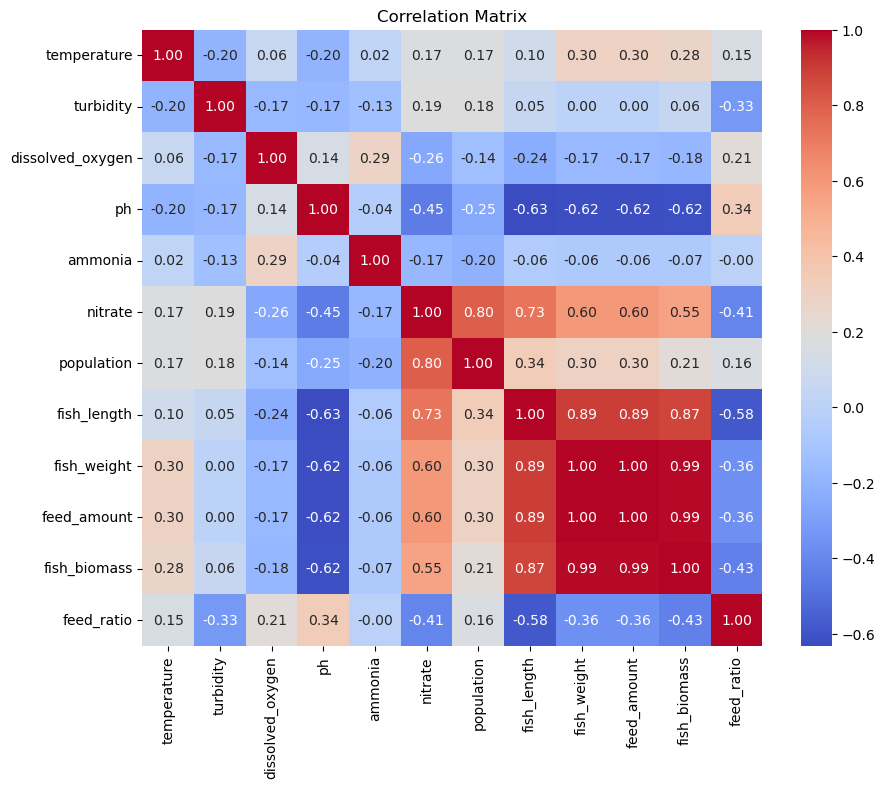

In [69]:
correlation_matrix = data_filtered_rand.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [68]:
data_filtered_rand.columns

Index(['date', 'temperature', 'turbidity', 'dissolved_oxygen', 'ph', 'ammonia',
       'nitrate', 'population', 'fish_length', 'fish_weight', 'pond',
       'feed_amount', 'fish_biomass', 'feed_ratio'],
      dtype='object')

In [212]:
data_filtered

,date,temperature,turbidity,dissolved_oxygen,ph,ammonia,nitrate,population,fish_length,fish_weight,pond
0,19-06-2021,24.8750,100.0,4.505,8.43365,0.45842,193.0,50.0,7.11000,2.9100,Pond 1
1,19-06-2021,24.9375,100.0,6.601,8.43818,0.45842,194.0,50.0,7.11000,2.9100,Pond 1
2,19-06-2021,24.8750,100.0,15.797,8.42457,0.45842,192.0,50.0,7.11000,2.9100,Pond 1
3,19-06-2021,24.9375,100.0,5.046,8.43365,0.45842,193.0,50.0,7.11000,2.9100,Pond 1
4,19-06-2021,24.9375,100.0,38.407,8.40641,0.45842,192.0,50.0,7.11000,2.9100,Pond 1
...,...,...,...,...,...,...,...,...,...,...,...
379583,16-01-2022,26.9375,51.0,15.374,6.30010,0.00000,1097.0,50.0,41.66213,620.9285,Pond 12
379584,16-01-2022,26.9375,51.0,15.504,6.30010,0.00000,1101.0,50.0,41.66213,620.9285,Pond 12
379585,16-01-2022,26.9375,51.0,16.357,6.30464,0.00000,1088.0,50.0,41.66213,620.9285,Pond 12
379586,16-01-2022,27.0000,51.0,15.898,6.27740,0.00000,1076.0,50.0,41.66213,620.9285,Pond 12


In [216]:
variance_per_column = data_filtered.var()

# Find the column with the smallest range (i.e., smallest variance)
column_with_least_range = variance_per_column.idxmin()

# Print the variance of each column
print("Variance of Each Column:")
print(variance_per_column)

# Print the column with the least range
print("\nColumn with the Least Range of Values:", column_with_least_range)

Variance of Each Column:
temperature              0.798985
turbidity              831.399110
dissolved_oxygen        94.867344
ph                       2.061675
ammonia                  0.997341
nitrate             378337.614063
population             136.954902
fish_length             49.788978
fish_weight           7995.380055
dtype: float64

Column with the Least Range of Values: temperature


C:\Users\Omar Atef\AppData\Local\Temp\ipykernel_11928\3552874651.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance_per_column = data_filtered.var()


In [215]:
variance_per_column = data_filtered.drop(columns={'temperature'}).var()

column_with_least_range = variance_per_column.idxmin()

print("Variance of Each Column:")
print(variance_per_column)

print("Excluding Temperature column,")
print("\nColumn with the Least Range of Values:", column_with_least_range)

Variance of Each Column:
turbidity              831.399110
dissolved_oxygen        94.867344
ph                       2.061675
ammonia                  0.997341
nitrate             378337.614063
population             136.954902
fish_length             49.788978
fish_weight           7995.380055
dtype: float64

Column with the Least Range of Values: ammonia


C:\Users\Omar Atef\AppData\Local\Temp\ipykernel_11928\526532429.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance_per_column = data_filtered.drop(columns={'temperature'}).var()


## Water Quality Use-Case (Ammonia Prediction)

In [72]:
water_quality_data = data_filtered_rand[['temperature','dissolved_oxygen','ph','ammonia','fish_weight']]

In [ ]:
# water_quality_data = data_filtered.drop(columns={'turbidity','nitrate','fish_length'})

In [73]:
water_quality_data.columns

Index(['temperature', 'dissolved_oxygen', 'ph', 'ammonia', 'fish_weight'], dtype='object')

In [74]:
water_quality_data.sample(3)

,temperature,dissolved_oxygen,ph,ammonia,fish_weight
378326,24.5000,6.094,7.91615,0.38000,10.36
2400,24.1875,3.795,7.54845,0.25700,12.60
364225,24.3750,5.967,7.09450,1.28654,70.60


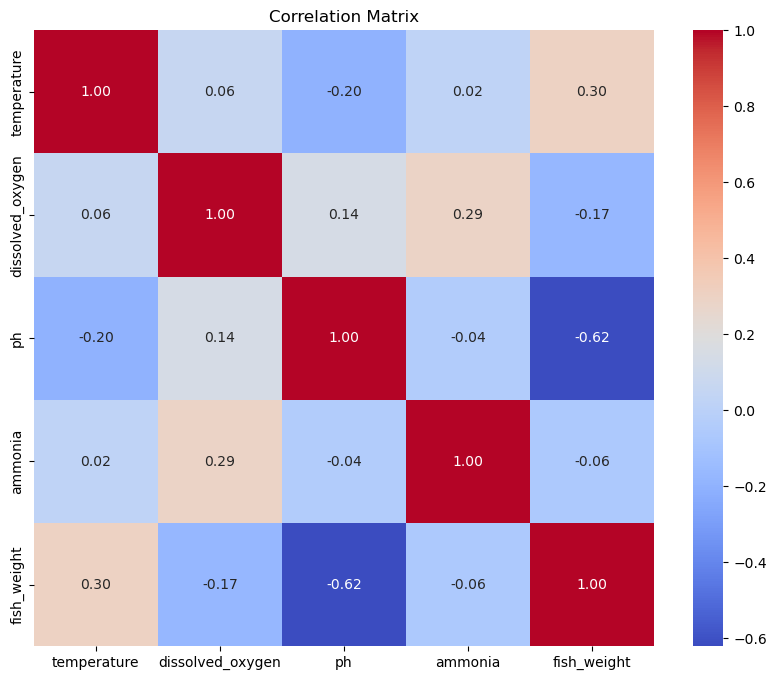

In [75]:
correlation_matrix = water_quality_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [76]:
X = water_quality_data.drop(columns=['ammonia'])
y = water_quality_data['ammonia']

In [77]:
print(X.shape)
print(y.shape)

(379588, 4)
(379588,)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
print(X_train.shape)
print(X_test.shape)

(303670, 4)
(75918, 4)


In [101]:
X_train.head(3)

,temperature,dissolved_oxygen,ph,fish_weight
274029,24.0000,0.000,7.47128,59.60
355207,24.8125,6.144,3.95319,205.55
119218,24.9375,2.501,6.91292,123.60


In [100]:
y_train.head(3)

274029    0.00109
355207    0.00111
119218    1.02155
Name: ammonia, dtype: float64

In [82]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
X_train_scaled

array([[-0.55489262, -1.00346982,  0.30426391, -0.31231111],
       [ 0.35487213, -0.37348861, -2.15071171,  1.32271714],
       [ 0.49483594, -0.74702727, -0.08536802,  0.40465914],
       ...,
       [-0.34494691, -0.85704841,  0.29475967, -0.66887578],
       [-1.11474786, -0.69965564,  0.06034969, -0.20879853],
       [ 0.28489023, -0.46536087,  0.07619009, -0.32821889]])

In [84]:
X_test_scaled

array([[-9.74784051e-01, -1.40321741e-01,  9.20235104e-02,
        -4.29490940e-01],
       [ 4.24854037e-01,  2.96323802e+00,  1.61714284e-01,
        -2.48231897e-01],
       [-9.04802147e-01, -6.51156111e-01,  5.40135329e-02,
        -2.03869363e-01],
       ...,
       [ 4.96261049e-03, -5.06887954e-01,  9.09297342e-01,
        -9.05267919e-01],
       [ 1.96445593e+00,  5.16728971e-01, -1.48715652e-01,
         5.97606134e+00],
       [ 2.84890228e-01, -6.65511152e-01,  1.55378125e-01,
        -3.77286543e-01]])

In [85]:
DT_model = DecisionTreeRegressor().fit(X_train_scaled, y_train)

In [86]:
print('Decision Tree')
print('Train accuracy:', DT_model.score(X_train_scaled, y_train))
print('Test accuracy:', DT_model.score(X_test_scaled, y_test))

Decision Tree
Train accuracy: 0.9849780684991374
Test accuracy: 0.8778843643408498


In [87]:
dt_y_test_pred = DT_model.predict(X_test_scaled)
dt_mse_test = mean_squared_error(y_test, dt_y_test_pred)
print('Mean Squared Error (MSE) - DT Test:', dt_mse_test)

Mean Squared Error (MSE) - DT Test: 0.12259946788247726


In [88]:
RF_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_scaled, y_train)

In [89]:
print('Random Forest')
print('Train accuracy:', RF_model.score(X_train_scaled, y_train))
print('Test accuracy:', RF_model.score(X_test_scaled, y_test))

Random Forest
Train accuracy: 0.9763099752701044
Test accuracy: 0.9157351263839563


In [90]:
rf_y_test_pred = RF_model.predict(X_test_scaled)
rf_mse_test = mean_squared_error(y_test, rf_y_test_pred)
print('Mean Squared Error (MSE) - RF Test:', rf_mse_test)

Mean Squared Error (MSE) - RF Test: 0.08459873799737343


In [93]:
with open('rf_ammonia_model.pkl', 'wb') as f:
    pickle.dump(RF_model, f)

In [119]:
df_results = pd.concat([y_test_series, rf_y_test_pred_series], axis=1, join='inner')
df_results.columns = ['Actual', 'Predicted']

### Classification Approach

In [121]:
water_quality_data.head()

,temperature,dissolved_oxygen,ph,ammonia,fish_weight
0,24.8125,15.002,7.58477,0.72440,11.502857
1,24.6875,6.880,7.92976,0.38000,10.360000
2,25.0625,17.044,8.20213,0.38000,6.860000
3,24.9375,16.439,7.04457,0.56293,143.542857
4,24.5625,1.056,7.60292,0.00007,163.360000


In [129]:
# Assuming water_quality_data is your DataFrame with ammonia readings
# Define the conditions and values for the new column
conditions = [
    (water_quality_data['ammonia'] < 0.02),
    (water_quality_data['ammonia'] >= 0.02) & (water_quality_data['ammonia'] < 0.5),
    (water_quality_data['ammonia'] >= 0.5)
]
values = ['Low', 'Moderate', 'High']

# Use numpy.where() to create the new column based on the conditions
water_quality_data['ammonia_level'] = np.select(conditions, values, default='Unknown')

C:\Users\Omar Atef\AppData\Local\Temp\ipykernel_11928\2558186545.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water_quality_data['ammonia_level'] = np.select(conditions, values, default='Unknown')


In [139]:
water_quality_data.ammonia_level.value_counts()

Moderate    131403
High        127705
Low         120480
Name: ammonia_level, dtype: int64

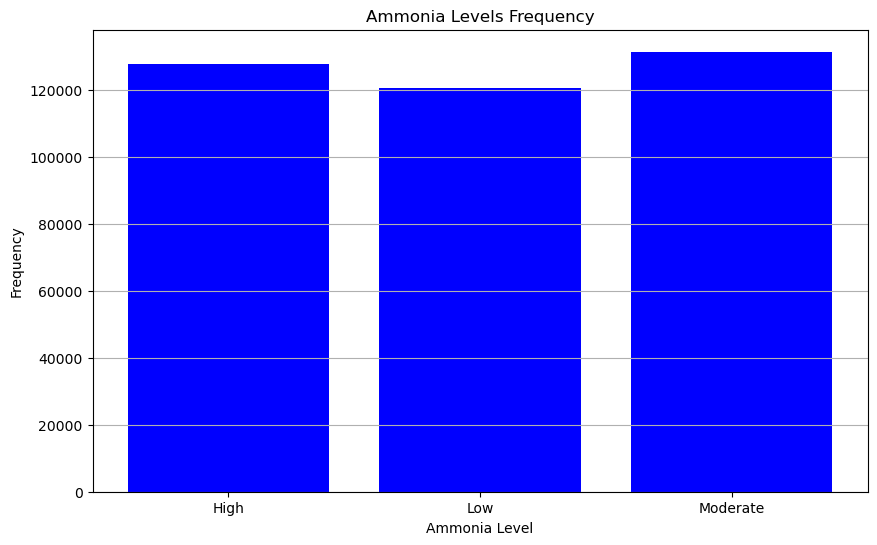

In [140]:
aggregated_data = water_quality_data.groupby(water_quality_data['ammonia_level']).size().reset_index(name='Frequency')

plt.figure(figsize=(10, 6))
bar_plot = plt.bar(aggregated_data['ammonia_level'], aggregated_data['Frequency'], color='blue')
plt.title('Ammonia Levels Frequency')
plt.xlabel('Ammonia Level')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [141]:
water_quality_data['ammonia_danger'] = water_quality_data['ammonia_level'].replace({'Low': 0, 'Moderate': 0, 'High': 1})

C:\Users\Omar Atef\AppData\Local\Temp\ipykernel_11928\941395946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water_quality_data['ammonia_danger'] = water_quality_data['ammonia_level'].replace({'Low': 0, 'Moderate': 0, 'High': 1})


In [142]:
water_quality_data.sample(6)

,temperature,dissolved_oxygen,ph,ammonia,fish_weight,ammonia_level,ammonia_danger
140192,24.3750,38.584,7.20345,1.23042,66.200000,High,1
248239,24.4375,9.703,7.51667,0.00103,48.714286,Low,0
303454,26.1875,26.028,8.40187,0.38000,3.360000,Moderate,0
146505,25.5000,5.406,3.56280,0.00072,205.550000,Low,0
163727,25.1250,3.332,7.51213,0.00443,96.880000,Low,0
95621,23.4375,12.319,7.65740,0.02216,10.405714,Moderate,0


In [144]:
water_quality_data.ammonia_danger.value_counts()

0    251883
1    127705
Name: ammonia_danger, dtype: int64

#### Data is mismatched. Should be taken into consideration during training

In [198]:
X = water_quality_data.drop(columns={'ammonia_danger','ammonia_level'})
y = water_quality_data['ammonia_danger']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [200]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression Classification Model

In [201]:
LR = LogisticRegression()

In [202]:
LR.fit(X_train_scaled, y_train)

LogisticRegression()

In [203]:
LR_predictions = LR.predict(X_test_scaled)
LR_accuracy = accuracy_score(y_test, LR_predictions)
print("Logistic Regression Model Accuracy:", LR_accuracy)

Logistic Regression Model Accuracy: 0.9978924629205195


In [204]:
df_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': LR_predictions})
df_predictions

,Actual,Predicted
45856,0,0
210666,0,0
369703,0,0
129810,1,1
112366,1,1
...,...,...
159737,1,1
99922,0,0
321801,1,1
270911,1,1


In [205]:
water_quality_data_preidctions = water_quality_data.merge(df_predictions, left_index=True, right_index=True)

In [206]:
water_quality_data_preidctions.isna().sum()

temperature         0
dissolved_oxygen    0
ph                  0
ammonia             0
fish_weight         0
ammonia_level       0
ammonia_danger      0
Actual              0
Predicted           0
dtype: int64

In [191]:
water_quality_data_preidctions.sample(30)

,temperature,dissolved_oxygen,ph,ammonia,fish_weight,ammonia_level,ammonia_danger,Actual,Predicted
311062,24.1875,15.180,7.53029,0.96284,15.128571,High,1,1,1
240489,25.3750,0.000,7.85259,0.00080,64.142857,Low,0,0,0
52339,25.0625,5.134,7.80266,0.45842,15.130000,Moderate,0,0,0
86434,23.8125,5.080,6.95378,0.00061,159.000000,Low,0,0,0
89465,23.1250,5.775,7.55299,0.17909,12.600000,Moderate,0,0,0
253163,25.4375,10.548,7.02641,0.31969,214.571429,Moderate,0,0,0
111761,24.3125,4.158,7.53937,0.00012,169.880000,Low,0,0,0
269545,24.8750,10.717,7.59384,0.24039,11.502857,Moderate,0,0,0
25796,25.3125,0.000,7.47582,0.00108,54.157143,Low,0,0,0
24533,24.5000,7.767,7.08996,0.83515,74.130000,High,1,1,1


In [192]:
water_quality_data_preidctions[water_quality_data_preidctions['Actual'] == water_quality_data_preidctions['Predicted']]

,temperature,dissolved_oxygen,ph,ammonia,fish_weight,ammonia_level,ammonia_danger,Actual,Predicted
8,23.6250,9.227,7.57569,0.55239,12.051429,High,1,1,1
9,24.4375,4.589,8.33378,0.38000,6.160000,Moderate,0,0,0
16,25.3125,11.574,8.40641,0.45842,3.850000,Moderate,0,0,0
22,23.8125,0.000,7.49398,0.00108,50.528571,Low,0,0,0
23,23.4375,3.338,7.54391,0.29696,12.600000,Moderate,0,0,0
...,...,...,...,...,...,...,...,...,...
379573,24.1250,29.912,7.46220,0.31097,27.771429,Moderate,0,0,0
379578,25.1250,0.464,7.50306,0.00080,54.157143,Low,0,0,0
379580,24.5000,38.635,7.31694,4.26444,61.690000,High,1,1,1
379581,24.7500,24.443,7.18529,3.53184,95.057143,High,1,1,1


In [193]:
water_quality_data_preidctions[water_quality_data_preidctions['Actual'] != water_quality_data_preidctions['Predicted']]

,temperature,dissolved_oxygen,ph,ammonia,fish_weight,ammonia_level,ammonia_danger,Actual,Predicted
3581,24.5625,0.000,7.58477,0.50271,45.085714,High,1,1,0
4059,24.5625,22.018,7.04003,0.50058,143.542857,High,1,1,0
4169,24.4375,2.603,7.16713,0.50439,67.080000,High,1,1,0
4940,24.5000,16.008,7.44858,0.50072,27.771429,High,1,1,0
6599,23.8750,5.954,7.16713,0.50248,58.180000,High,1,1,0
...,...,...,...,...,...,...,...,...,...
367974,24.1250,4.327,7.09904,0.50058,69.720000,High,1,1,0
371835,24.0000,2.501,7.12628,0.50248,68.400000,High,1,1,0
372210,23.8125,6.070,7.17167,0.50248,67.520000,High,1,1,0
377635,24.3125,0.270,6.90385,0.50058,139.100000,High,1,1,0


In [194]:
precision = precision_score(y_test, LR_predictions)
print("LR precision score: ", precision)
recall = recall_score(y_test, LR_predictions)
print("LR recall score: ", recall)

LR precision score:  1.0
LR recall score:  0.9937355624290357


In [184]:
cm = confusion_matrix(y_test, LR_predictions)
print("Confusion Matrix")
cm

Confusion Matrix


array([[50377,     0],
       [  160, 25381]], dtype=int64)

In [209]:
# Initialize your model (e.g., Logistic Regression)
model = LogisticRegression()

# Define the number of folds for k-fold cross-validation
k = 5

# Initialize the k-fold cross-validation splitter
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores (Logistic Regression):", cv_scores)

# Calculate and print the average cross-validation score
avg_cv_score = np.mean(cv_scores)
print("Average Cross-Validation Score (Logistic Regression):", avg_cv_score)

Cross-Validation Scores: [0.99815591 0.99857741 0.99818225 0.99811636 0.99787926]
Average Cross-Validation Score: 0.9981822387197419


### Random Forest Classification Model

In [210]:
# Initialize your Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the number of folds for k-fold cross-validation
k = 5

# Initialize the k-fold cross-validation splitter
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_rf = cross_val_score(rf_model, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores (Random Forest):", cv_scores_rf)

# Calculate and print the average cross-validation score
avg_cv_score_rf = np.mean(cv_scores_rf)
print("Average Cross-Validation Score (Random Forest):", avg_cv_score_rf)

Cross-Validation Scores (Random Forest): [1. 1. 1. 1. 1.]
Average Cross-Validation Score (Random Forest): 1.0
